<a href="https://colab.research.google.com/github/arieles08/TP1_DMCyT/blob/main/Pre_TP_DM_CyT_Grupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre-TP - DM en Ciencia y Tecnología

> **Preprocesamiento de imágenes**


### Librerias y Paquetes

In [ ]:
pip install Clustimage -q gwpy

     |████████████████████████████████| 1.4 MB 4.1 MB/s 
     |████████████████████████████████| 11.2 MB 41.7 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
     |████████████████████████████████| 51 kB 6.1 MB/s 
     |████████████████████████████████| 4.0 MB 33.7 MB/s 
     |████████████████████████████████| 957 kB 36.6 MB/s 


In [ ]:
from clustimage import Clustimage
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import numpy as np
import math

## 4. Preprocesamiento de los datos

### 4.1 Carga el dataset y sus etiquetas

In [ ]:
# Accessing My Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### **PASO 1: Crear listado con la "Ruta / Path" para cada imagen**

In [ ]:
# PASO 1.1: Crear variable "image_path" con la ruta de la carpeta "flower_images" donde estan --> Nota: CAMBIAR RUTA DE ARCHIVOS A LA DE CADA UNO
!gdown --id
image_path = "/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images" #PONER EL PATH DE CADA UNO

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok]
             url_or_id
gdown: error: the following arguments are required: url_or_id


In [ ]:
# PASO 1.2: Creo una lista con los nombres de las 210 imágenes que se encuentran en la carpeta ""flower_images" (png)
path = sorted([os.path.join(image_path, file)
                          for file in os.listdir(image_path )
                          if file.endswith('.png')])
print(len(path))
path[0:5]

210


['/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images/0001.png',
 '/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images/0002.png',
 '/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images/0003.png',
 '/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images/0004.png',
 '/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images/0005.png']

##### **PASO 2: Cargar el archivo con las Etiquetas (labels) correspondiente a cada imagen**

In [ ]:
#PASO 2.1: Cargar el archivo con las etiquetas (labels) -> df_etiquetas
file_nm = '/flower_labels.csv'
ruta = image_path + file_nm

df_etiquetas = pd.read_csv(ruta)
print(len(df_etiquetas))
df_etiquetas.head()

210


file  label
0  0001.png      0
1  0002.png      0
2  0003.png      2
3  0004.png      0
4  0005.png      0

**Exploración:** vemos cuantas etiquetas tenemos (= tipo de flores) y la cantidad de ejemplos para cada una

In [ ]:
# Listado de las 10 etiquetas (tipo de flores) -> etiquetas
etiquetas = np.sort(df_etiquetas.label.unique())
etiquetas

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# ¿Cuantos ejemplos (imagenes) tengo para cada especie?
Q = df_etiquetas['label'].value_counts().rename("Cant")
P = 100*df_etiquetas['label'].value_counts(normalize=True).round(2).rename("%")

pd.concat([Q, P], axis=1).sort_index()

Cant     %
0    21  10.0
1    20  10.0
2    19   9.0
3    22  10.0
4    21  10.0
5    25  12.0
6    23  11.0
7    15   7.0
8    26  12.0
9    18   9.0

### 4.2 Explorar y graficar las imágenes de flores

##### AUX: **Seleccionando ejemplos** para cada especie **dentro del listado 'path'**, creado en el paso anterior

In [ ]:
#Lista que TRAE "La Posicion de 0 a 209 (index)" para TODOS LOS EJEMPLOS que hay par la MISMA ESPECIE
especie = 0   #valores de 0 a 9
filtro_especie = ( df_etiquetas.label == especie )

ej_misma_esp = df_etiquetas.label[filtro_especie]

In [ ]:
#DataFrame con la posición para de TODOS los ejemplos (una por fila) para TODAS LAS ESPECIES (una por columna) -> df_ejemplos
cant_especies = len(df_etiquetas.label.unique())
list_ej = []

for i in range(cant_especies):
  especie = i
  filtro_especie = ( df_etiquetas.label == especie )
  ej_misma_esp = df_etiquetas.index[filtro_especie].tolist()
  list_ej.append(ej_misma_esp)
  
df_ejemplos = pd.DataFrame(list_ej).transpose()
df_ejemplos.head()

0     1     2     3     4     5     6     7     8     9
0  0.0   5.0   2.0  30.0  21.0  24.0   6.0  13.0  35.0  37.0
1  1.0  15.0  20.0  34.0  23.0  27.0  18.0  14.0  39.0  40.0
2  3.0  41.0  26.0  43.0  45.0  32.0  25.0  22.0  48.0  53.0
3  4.0  44.0  38.0  47.0  51.0  36.0  28.0  42.0  57.0  70.0
4  7.0  49.0  60.0  50.0  69.0  56.0  29.0  46.0  59.0  72.0

##### **GRAFICO 1: Con 1 ejemplo para cada una de las 10 especies**

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


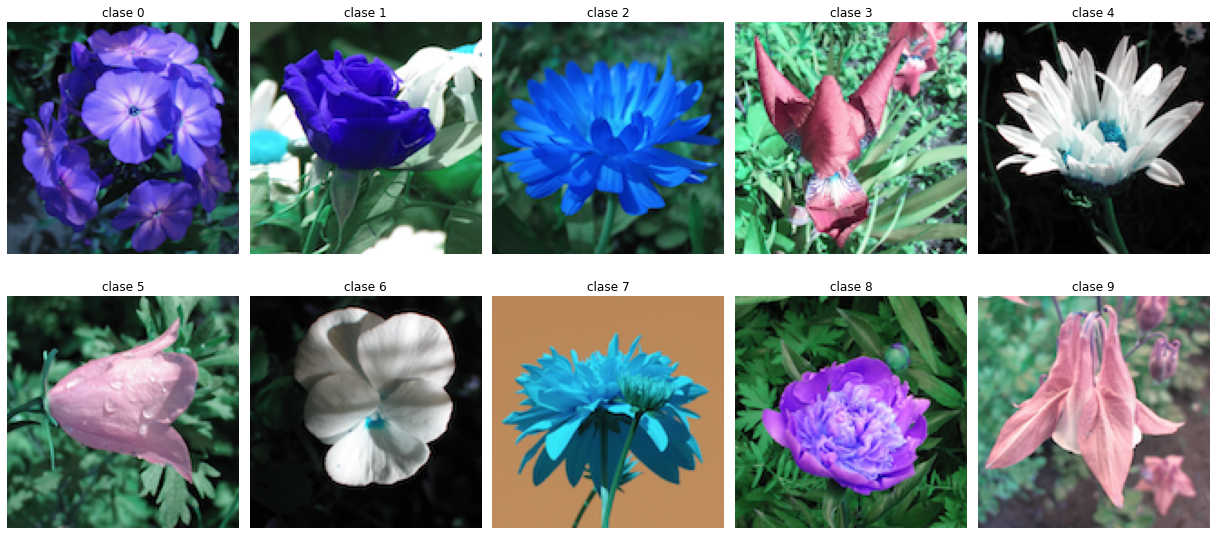

In [ ]:
# Grafico con 1 EJEMPLO DE CADA ESPECIE -> desde el dataframe 'df_ejemplos'
ej_n = 0  #valores de 0 a 14
 
ejemplos = df_ejemplos.iloc[ej_n, :].astype(int)

cl = Clustimage()

plt.figure(figsize = (17,8))
for i in range(len(ejemplos)):
  img = cl.imread(path[ejemplos[i]], dim=(128,128),colorscale=1) #Levanta la imagen
  plt.subplot(2,5,i+1)
  plt.title("clase" + ' ' + str(etiquetas[i]))
  imagen = img.reshape(128,128,3)
  plt.imshow(imagen)
  plt.axis('off')
plt.tight_layout()

##### **Gráfico 2: con N ejemplos para LA MISMA especie**

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


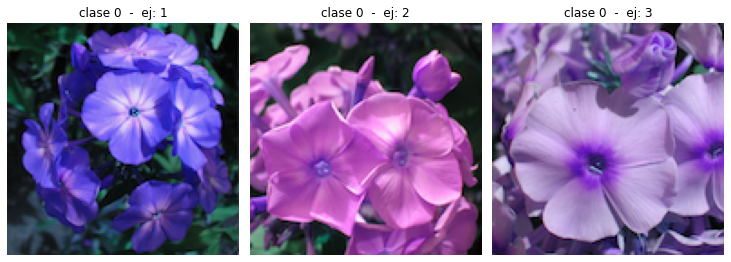

In [ ]:
# Grafico con N ejemplos de UNA MISMA ESPECIA -> desde el dataframe 'df_ejemplos'
cant_ej = 3 #valores de 1 a 15
especie = 0

ejemplos2 = df_ejemplos.iloc[:cant_ej, especie].astype(int)

etiquetas = np.sort(df_etiquetas.label.unique())
n = len(etiquetas)
cl = Clustimage()

f = math.ceil(cant_ej/5)

plt.figure(figsize = (17, f*4))
for i in range(len(ejemplos2)):
  img = cl.imread(path[ejemplos2[i]], dim=(128,128),colorscale=1) #Levanta la imagen
  plt.subplot(f,5,i+1)
  plt.title("clase " + str(especie)+ "  -  ej: " + str(i+1) )
  imagen = img.reshape(128,128,3)
  plt.imshow(imagen)
  plt.axis('off')
plt.tight_layout()

##### **Gráfico 3: con 5 ejemplos para CADA una de las 10 ESPECIES**

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


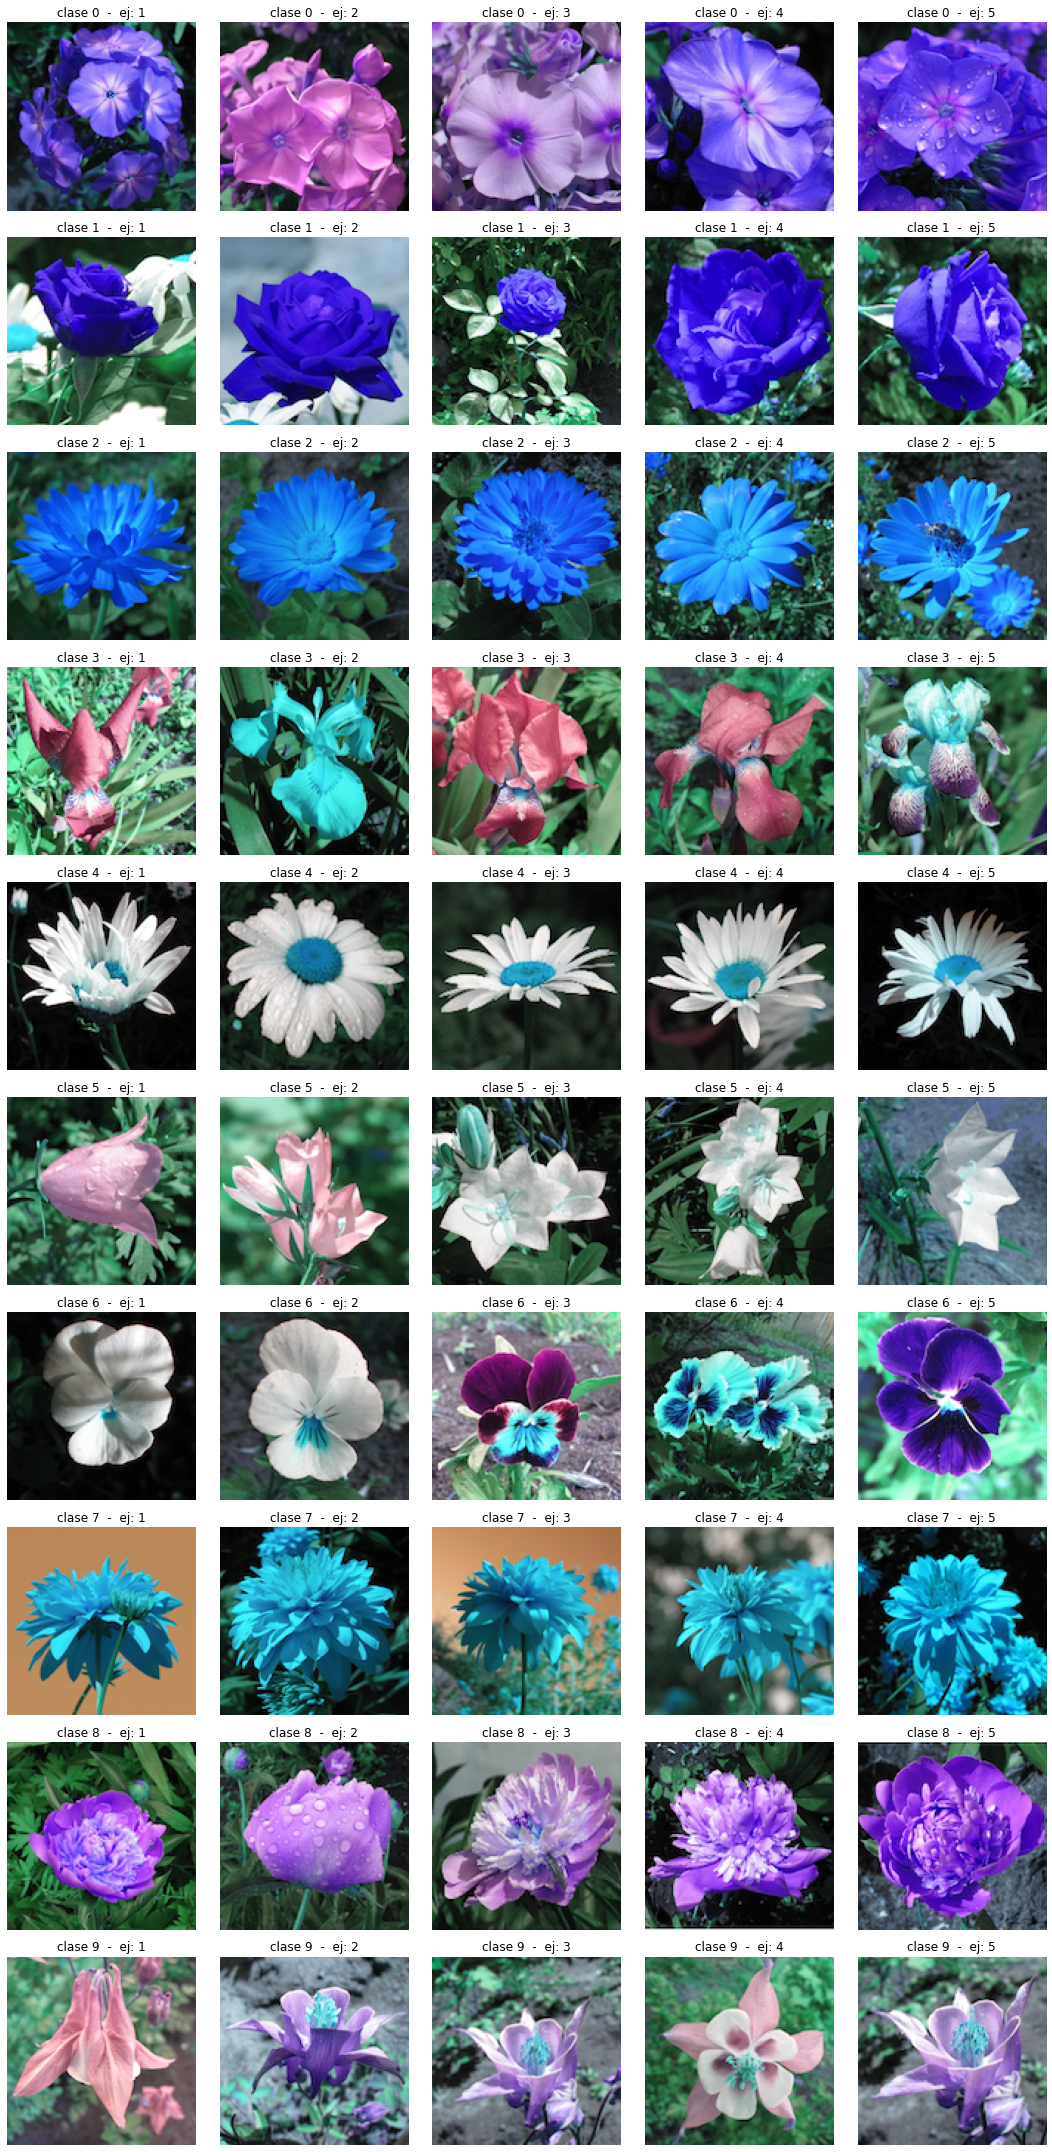

In [ ]:
# Grafico con N ejemplos de LA MISMA ESPECIE -> desde el dataframe 'df_ejemplos'
etiquetas = np.sort(df_etiquetas.label.unique())
n = len(etiquetas)

c = 5 #cantidad de ejemplos a graficar

ejemplos2 = df_ejemplos.iloc[:c, :].astype(int)

e = 0   #especies (aux p/ for)
ej = 1  #ejemplos (aux p/ for)
cl = Clustimage()
plt.figure(figsize = ((c*3),(n*3)))
for i in range(c*n):
  img = cl.imread(path[ejemplos2.iloc[(ej-1),e]], dim=(128,128),colorscale=1) #Levanta la imagen
  plt.subplot(n,5,i+1)
  plt.title("clase " + str(etiquetas[e]) + "  -  ej: " + str(ej))
  imagen = img.reshape(128,128,3)
  plt.imshow(imagen)
  plt.axis('off')
  if (i+1) == (e+1)*c:
    e = e + 1
  if ej >= c:
    ej = 0
  ej = ej + 1
plt.tight_layout()

## 5. Manipulación de datos

### 5.1 Cambio de intensidad del brillo
Cambiar la intensidad de una de las imágenes en escala de grises, transformarla en una imagen con mucho y otra con poco brillo.

In [ ]:
# Seleccion de ejemplo a modificar:
especie = 2  # 0 a 9
n_ej= 3     # 0 a 14

ie = df_ejemplos.iloc[n_ej,especie].astype(int)

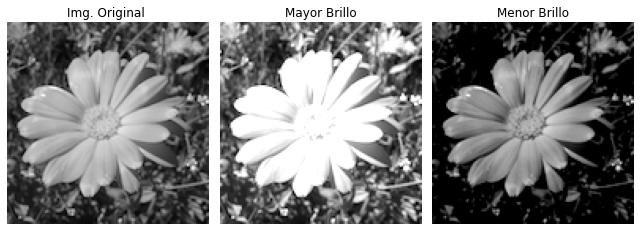

In [ ]:
# Se imprime en blanco y negro y se mofican el valor del brillo
mas_brillo = 150
menos_brillo = 80


plt.figure(figsize = ((3*3),4))
#Imagen Original
img = cl.imread(path[ie], dim=(128,128),colorscale=0) #Levanta la imagen
arr = img

img1 = np.array([num for num in arr]) #no es necesario -> lo agrego para ver como se reempra expresada esa imagen en un array
plt.subplot(1,3,1)
plt.title("Img. Original ")
imagen = img1.reshape(128,128)
plt.imshow(imagen, cmap='gray')
plt.axis('off')

#Imagen con aumento de brillo
arr=img
img2=np.array([min([round(num*(mas_brillo/100)), 255]) for num in arr])
plt.subplot(1,3,2)
plt.title("Mayor Brillo")
imagen2 = img2.reshape(128,128)
plt.imshow(imagen2, cmap='gray')
plt.axis('off')

#Imagen con menos brillo
arr=img
img3=np.array([max([round(num - menos_brillo), 0]) for num in arr])
plt.subplot(1,3,3)
plt.title("Menor Brillo")
imagen3 = img3.reshape(128,128)
plt.imshow(imagen3, cmap='gray')
plt.axis('off')

plt.tight_layout()

### 5.2 Conversion a blanco y negro Binario
Convertir una de las imágenes a blanco y negro (binario). ¿Es la única manera? Si existen otras transformaciones mostrar más de una conversión.


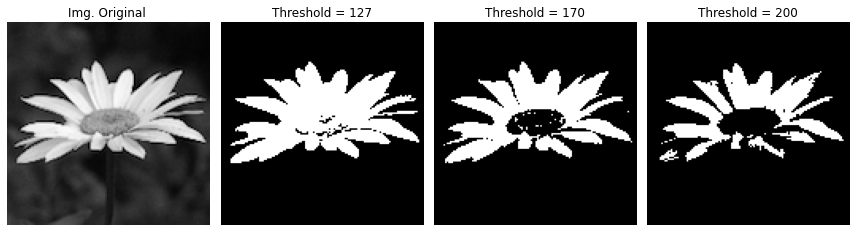

In [ ]:
# Se transforma el rango de valores de cada pixel que va de 0 a 255 en un RANGO BINARIO de 0 (blanco) o 255 (negro)
# para esto se fija un Threshold por encima del cual esta en Negro y debajo en Blanco -> infinitas posibilidades segun el valor del Threshold establecido

# -> Thresholds usados: 90, 127, 180, 200

n_ej = 45 #ejemplo numero... de la carpeta de imagenes

plt.figure(figsize = ((3*4),4))
#Imagen Original
img = cl.imread(path[n_ej], dim=(128,128),colorscale=0) #Levanta la imagen
arr = img

img1 = np.array([num for num in arr]) #no es necesario -> lo agrego para ver como se reempra expresada esa imagen en un array
plt.subplot(1,4,1)
plt.title("Img. Original ")
imagen = img1.reshape(128,128)
plt.imshow(imagen, cmap='gray')
plt.axis('off')


#Imagen con menos brillo
arr=img5
img3=np.array([int(num>90)*255 for num in arr])
plt.subplot(1,4,3)
plt.title("Threshold = 90")
imagen3 = img3.reshape(128,128)
plt.imshow(imagen3, cmap='gray')
plt.axis('off')

#Imagen con aumento de brillo
arr=img
img2=np.array([round(num/255)*255 for num in arr])
plt.subplot(1,4,2)
plt.title("Threshold = 127")
imagen2 = img2.reshape(128,128)
plt.imshow(imagen2, cmap='gray')
plt.axis('off')

#Imagen con menos brillo
arr=img
img3=np.array([int(num>170)*255 for num in arr])
plt.subplot(1,4,3)
plt.title("Threshold = 170")
imagen3 = img3.reshape(128,128)
plt.imshow(imagen3, cmap='gray')
plt.axis('off')

#Imagen con menos brillo
arr=img
img4=np.array([int(num>200)*255 for num in arr])
plt.subplot(1,4,4)
plt.title("Threshold = 200")
imagen4 = img4.reshape(128,128)
plt.imshow(imagen4, cmap='gray')
plt.axis('off')

plt.tight_layout()

### 5.3 Recortar el Centro
Recortar una parte significativa de la imagen, quedándose sólo con el círculo centralde la misma.

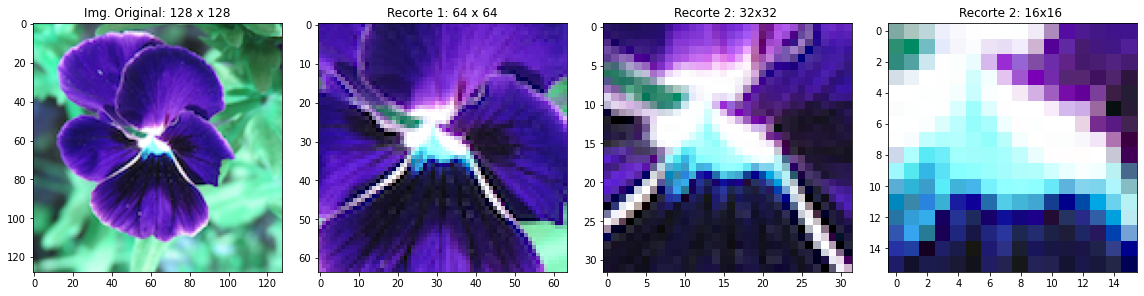

In [ ]:
# SE recorta la imagen, haciendo una selección

n_ej = 29 #ejemplo numero... de la carpeta de imagenes

#Cargo la imagen de ejemplo
img = cl.imread(path[n_ej], dim=(128,128),colorscale=1) #Levanta la imagen

plt.figure(figsize = ((4*4),4))

#Grafico la original
plt.subplot(1,4,1)
plt.title("Img. Original: 128 x 128")
imagen = img.reshape(128,128,3)
plt.imshow(imagen, cmap='gray')

#1er Recorte de 64 x 64 centrado en el punto (64,64)
  # -> low = 64 - 32 = 32
  # -> up  = 64 + 32 = 96
plt.subplot(1,4,2)
plt.title("Recorte 1: 64 x 64")
imagen1 = imagen[32:96,32:96]
plt.imshow(imagen1)

#2do Recorte de 32 x 32 centrado en el punto (64,64)
  # -> low = 64 - 16 = 48
  # -> up  = 64 + 16 = 80
plt.subplot(1,4,3)
plt.title("Recorte 2: 32x32" + ' ')
imagen2 = imagen[48:80,48:80]
plt.imshow(imagen2)

#3er Recorte de 16 x 16 centrado en el punto (64,64)
  # -> low = 64 - 8 = 56
  # -> up  = 64 + 8 = 72
plt.subplot(1,4,4)
plt.title("Recorte 3: 16x16" + ' ')
imagen2 = imagen[56:72,56:72]
plt.imshow(imagen2)

plt.tight_layout()

In [ ]:
# Se transforma el rango de valores de cada pixel que va de 0 a 255 en un RANGO BINARIO de 0 (blanco) o 255 (negro)
# para esto se fija un Threshold por encima del cual esta en Negro y debajo en Blanco -> infinitas posibilidades segun el valor del Threshold establecido

# -> Thresholds usados: 90, 127, 180, 200

n_ej = 23 #ejemplo numero... de la carpeta de imagenes

plt.figure(figsize = ((3*3),4))
#Imagen Original
img = cl.imread(path[n_ej], dim=(128,128),colorscale=0) #Levanta la imagen
arr = img

img1 = np.array([num for num in arr]) #no es necesario -> lo agrego para ver como se reempra expresada esa imagen en un array
plt.subplot(1,4,1)
plt.title("Img. Original ")
imagen = img1.reshape(128,128)
plt.imshow(imagen, cmap='gray')
plt.axis('off')


#Imagen con menos brillo
arr=img5
img3=np.array([int(num>90)*255 for num in arr])
plt.subplot(1,4,3)
plt.title("Threshold = 90")
imagen3 = img3.reshape(128,128)
plt.imshow(imagen3, cmap='gray')
plt.axis('off')

#Imagen con aumento de brillo
arr=img
img2=np.array([round(num/255)*255 for num in arr])
plt.subplot(1,4,2)
plt.title("Threshold = 127")
imagen2 = img2.reshape(128,128)
plt.imshow(imagen2, cmap='gray')
plt.axis('off')

#Imagen con menos brillo
arr=img
img3=np.array([int(num>170)*255 for num in arr])
plt.subplot(1,4,3)
plt.title("Threshold = 170")
imagen3 = img3.reshape(128,128)
plt.imshow(imagen3, cmap='gray')
plt.axis('off')

#Imagen con menos brillo
arr=img
img4=np.array([int(num>200)*255 for num in arr])
plt.subplot(1,4,4)
plt.title("Threshold = 200")
imagen4 = img4.reshape(128,128)
plt.imshow(imagen4, cmap='gray')
plt.axis('off')

plt.tight_layout()

### 5.3 Mezcla random de pixel y partes de imagen
Generar dos imágenes random: una imagen mezclando los pixels y otra mezclando
partes de diferentes imágenes.

### 5.4 Aplicar 2 tipos de Filtros
Aplicar dos tipos diferentes de filtros sobre una imagen, explique en qué casos conviene usar cada uno.

### 5.5 Calcular Imagen Promedio
Calcular imagen promedio global y el promedio entre las distintas especies. 
¿Se pueden distinguir los promedios? 
¿Cómo quedan los promedios si consideran las imágenes en blanco y negro?

## 6. Búsqueda de features

### 6.1 Analizar distribuciones de pixeles por especie
Analizar las distribuciones de valores de pixels por cada especie. 
¿Se puede distinguir una especie en algún rango de color?

### 6.2 Representacion PCA
Realizar una inspección de las componentes principales del dataset y analizar si se pueden identificar las especies en esta representación.